In [82]:
###carga las noticias relacionadas a la violencia de genero

import glob
import pandas as pd
csv_files = glob.glob('1-4mes/NoticiasRelacionadasALaViolenciaGeGenero/*.csv')



list_data = []
  
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
#Para chequear que todo está bien, mostramos la list_data por consola

 
data1 = pd.concat(list_data,ignore_index=True)
data1.drop('Unnamed: 0', axis=1, inplace=True)


In [83]:
csv_files = glob.glob('5-8mes/NoticiasRelacionadasALaViolenciaGeGenero/*.csv')



list_data = []
  
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
#Para chequear que todo está bien, mostramos la list_data por consola

 
data2 = pd.concat(list_data,ignore_index=True)
data2.drop('Unnamed: 0', axis=1, inplace=True)


In [84]:
csv_files = glob.glob('9-12mes/NoticiasRelacionadasALaViolenciaGeGenero/*.csv')



list_data = []
  
for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
#Para chequear que todo está bien, mostramos la list_data por consola

 
data3 = pd.concat(list_data,ignore_index=True)
data3.drop('Unnamed: 0', axis=1, inplace=True)

In [85]:
data = pd.concat([data1, data2, data3], axis=0)


In [86]:
data.drop_duplicates(subset='title', keep='first',inplace=True)
data.reset_index(inplace=True,drop=True)
data

,title,text
0,"Emilfork: ""Las injusticias con Chiloé se deben...",Cuando queda poco menos de un mes para las ele...
1,Desde mitigar los efectos del cambio climático...,La Fundación dio a conocer ayer las ganadoras ...
2,Las candidatas que aspiran a redactar una Cart...,Hoy se conmemora un nuevo Día Internacional de...
3,"Después de 5 semanas en fase 2, Puerto Montt v...",A un mes y siete días de haber avanzado a fase...
4,Autoridades preparan arremetida contra los rui...,Una fuerte arremetida están preparando las aut...
...,...,...
372,Sujeto fue detenido por violación y almacenami...,Detectives de la Brigada Investigadora de Deli...
373,Menor de edad sufrió aborto: Detienen a sujeto...,Detectives de la Policía de Investigaciones ef...
374,PDI detiene a sujeto acusado de violación de u...,Detectives de la Brigada Investigadora de Deli...
375,Formalizan a sujeto acusado de violación reite...,Un indignante caso de agresión sexual reiterad...


In [87]:
data[data.duplicated(['title'], keep=False)]

,title,text


In [88]:
data.to_csv('noticias relacionadas a la violencia de genero.csv')

In [89]:
titulos = data.title.values.tolist()

In [90]:
noticias = data.text.values.tolist()

In [91]:
import spacy
from spacy.matcher import Matcher

In [92]:
nlp = spacy.load("es_core_news_md")

In [93]:
matcher = Matcher(nlp.vocab)

In [94]:
import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [95]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [96]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [97]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [98]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [99]:
id2word[179]

'auspicio'

In [100]:
texts = noticias_procesadas

In [101]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

In [102]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        #print('hola')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [103]:
start=2
limit=15
step=2

In [104]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


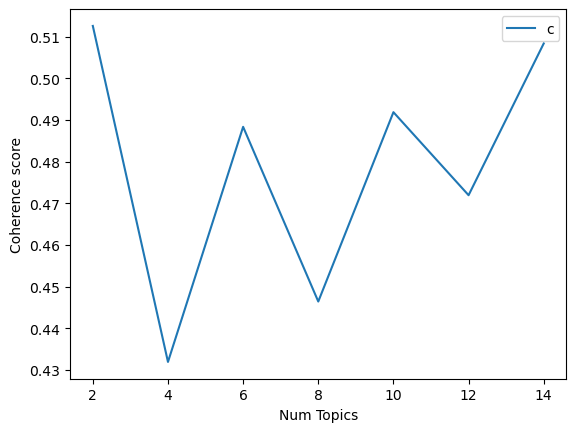

In [105]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [108]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [109]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

/home/fernando/miniconda3/envs/tal/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.282651 -0.025169       1        1  40.683521
5      0.040264  0.245207       2        1  23.516724
4      0.049681 -0.149362       3        1   8.709313
7      0.083411 -0.026251       4        1   8.475264
6     -0.094520  0.070278       5        1   7.701908
3     -0.129093 -0.013833       6        1   4.803395
2     -0.122247 -0.049374       7        1   3.820608
0     -0.110148 -0.051495       8        1   2.289268, topic_info=                    Term        Freq       Total Category  logprob  loglift
135            violencia  253.000000  253.000000  Default  30.0000  30.0000
291              mujeres  145.000000  145.000000  Default  29.0000  29.0000
86                 mujer  233.000000  233.000000  Default  28.0000  28.0000
350              víctima  453.000000  453.000000  Default  27.0000  27.0000
1055            imputado  366.000000  366.000000  Default  26.0000  26.0000
...                  ...         ...         ...      ...      ...      ...
851            denuncias    3.873322  101.869731   Topic8  -5.7353   0.5074
306             personas    3.520457  120.386194   Topic8  -5.8308   0.2448
3346  connotación sexual    3.151157   55.748181   Topic8  -5.9416   0.9039
145                 2020    2.951608   34.497364   Topic8  -6.0071   1.3184
3345         connotación    2.864591   58.928325   Topic8  -6.0370   0.7530

[527 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
3600      3  0.925300          2017
145       2  0.260890          2020
145       3  0.405828          2020
145       5  0.144939          2020
145       7  0.086963          2020
...     ...       ...           ...
139       8  0.100609         zonas
1188      2  0.258163         áreas
1188      5  0.258163         áreas
1188      6  0.516326         áreas
1706      6  0.802218  áreas verdes

[922 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 5, 8, 7, 4, 3, 1])

In [110]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.007*"año" + 0.005*"semestre" + 0.005*"secretaria" + 0.004*"libertad '
  'condicional" + 0.004*"comunas" + 0.004*"casos" + 0.004*"delegado" + '
  '0.004*"2021" + 0.004*"ministro" + 0.004*"plan" + 0.004*"año pasado" + '
  '0.004*"congregación" + 0.004*"director regional" + 0.003*"informe" + '
  '0.003*"padre" + 0.003*"denuncias" + 0.003*"periodo" + 0.003*"capital" + '
  '0.003*"derivación" + 0.003*"personas" + 0.003*"sacerdotes" + 0.003*"fuegos" '
  '+ 0.003*"aumento" + 0.003*"connotación sexual" + 0.003*"capital regional" + '
  '0.002*"2020" + 0.002*"connotación" + 0.002*"mujer adulta" + '
  '0.002*"internos" + 0.002*"Imagen" + 0.002*"cuarentena" + 0.002*"fecha" + '
  '0.002*"fuegos artificiales" + 0.002*"nivel nacional" + 0.002*"observación" '
  '+ 0.002*"región" + 0.002*"Eduardo Tampe" + 0.002*"supervisión" + '
  '0.002*"incremento" + 0.002*"aumento de casos" + 0.002*"sanciones" + '
  '0.002*"comparación" + 0.002*"cuanto" + 0.002*"diciembre" + 0.002*"daño" + '
  '0.002*"Edua

In [111]:
###  ¿Cuál es el tópico principal de cada documento?

In [112]:
def format_topics_documents(ldamodel, corpus, texts, titles):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    titless = pd.Series(titles)
    sent_topics_df = pd.concat([sent_topics_df,titless ,contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=lda_model, corpus=dataset, texts=noticias, titles=titulos)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Title' ,'Text']
df_dominant_topic.head(10)

/tmp/ipykernel_8888/1388805627.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,0,3,0.4914,"vecinos, comuna, trampas, país, agua, fruta, s...","Emilfork: ""Las injusticias con Chiloé se deben...",Cuando queda poco menos de un mes para las ele...
1,1,6,0.7678,"niños, niñas, país, años, residencia, mujeres,...",Desde mitigar los efectos del cambio climático...,La Fundación dio a conocer ayer las ganadoras ...
2,2,2,0.7587,"mujeres, violencia, mujer, género, sociedad, h...",Las candidatas que aspiran a redactar una Cart...,Hoy se conmemora un nuevo Día Internacional de...
3,3,5,0.4865,"colegio, denuncia, denuncias, parte, casos, si...","Después de 5 semanas en fase 2, Puerto Montt v...",A un mes y siete días de haber avanzado a fase...
4,4,5,0.4126,"colegio, denuncia, denuncias, parte, casos, si...",Autoridades preparan arremetida contra los rui...,Una fuerte arremetida están preparando las aut...
5,5,7,0.3808,"años, mujer, víctima, fiscal, detención, situa...",FOSIS y Fiscalía Regional renovaron convenio p...,Un total de 30 usuarias serán beneficiadas a t...
6,6,1,0.7004,"años, víctima, imputado, delito, hechos, antec...",Fiscalía confirma que investiga secuestro con ...,"""Ayúdame, estoy amenazada llama al 133, me tie..."
7,7,5,0.6637,"colegio, denuncia, denuncias, parte, casos, si...",Mujeres recuerdan a Claudia Agüero y repudian ...,Un nuevo llamado a movilización convocó a muje...
8,8,6,0.7206,"niños, niñas, país, años, residencia, mujeres,...",Estudio revela una baja regional en la ocupaci...,El Observatorio Laboral de Los Lagos lanzó -en...
9,9,6,0.6913,"niños, niñas, país, años, residencia, mujeres,...","""Lo más importante será contar con una residen...",La creación de la primera residencia para madr...


In [113]:
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,0,3,0.4914,"vecinos, comuna, trampas, país, agua, fruta, s...","Emilfork: ""Las injusticias con Chiloé se deben...",Cuando queda poco menos de un mes para las ele...
1,1,6,0.7678,"niños, niñas, país, años, residencia, mujeres,...",Desde mitigar los efectos del cambio climático...,La Fundación dio a conocer ayer las ganadoras ...
2,2,2,0.7587,"mujeres, violencia, mujer, género, sociedad, h...",Las candidatas que aspiran a redactar una Cart...,Hoy se conmemora un nuevo Día Internacional de...
3,3,5,0.4865,"colegio, denuncia, denuncias, parte, casos, si...","Después de 5 semanas en fase 2, Puerto Montt v...",A un mes y siete días de haber avanzado a fase...
4,4,5,0.4126,"colegio, denuncia, denuncias, parte, casos, si...",Autoridades preparan arremetida contra los rui...,Una fuerte arremetida están preparando las aut...
...,...,...,...,...,...,...
372,372,1,0.5196,"años, víctima, imputado, delito, hechos, antec...",Sujeto fue detenido por violación y almacenami...,Detectives de la Brigada Investigadora de Deli...
373,373,1,0.8179,"años, víctima, imputado, delito, hechos, antec...",Menor de edad sufrió aborto: Detienen a sujeto...,Detectives de la Policía de Investigaciones ef...
374,374,1,0.6321,"años, víctima, imputado, delito, hechos, antec...",PDI detiene a sujeto acusado de violación de u...,Detectives de la Brigada Investigadora de Deli...
375,375,1,0.7938,"años, víctima, imputado, delito, hechos, antec...",Formalizan a sujeto acusado de violación reite...,Un indignante caso de agresión sexual reiterad...


In [44]:
###agregamos una columa para identificar la comuna de la que se habla en el texto

In [114]:
import spacy
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_md")
matcher = Matcher(nlp.vocab)

In [115]:
from spacy.matcher import PhraseMatcher

In [116]:
cities = ["Ancud", "Castro", "Chonchi",
          "Curaco de Vélez", "Dalcahue", "Puqueldón",
          "Queilén", "Quemchi", "Quellón",
          "Quinchao", "Calbuco", "Cochamó",
          "Fresia", "Frutillar", "Llanquihue",
          "Los Muermos", "Maullín", "Puerto Montt",
          "Puerto Varas", "Osorno", "Puerto Octay",
          "Purranque", "Puyehue", "Río Negro",
          "San Juan de la Costa", "San Pablo", "Chaitén",
          "Futaleufú", "Hualaihué", "Palena"]

In [117]:
for city in cities:
    #print(city)
    df_dominant_topic.insert(6,city.replace(" ","_"),0)

In [118]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

In [119]:
for index, row in df_dominant_topic.iterrows():
    print(index)
    txt = row["Text"]

    try:

        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            df_dominant_topic.at[index, span.text.replace(" ", "_")] = 1
    except Exception as e:
        print(e)
        pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [120]:
prueba = df_dominant_topic.loc[df_dominant_topic['Palena']==1]
prueba

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text,Palena,Hualaihué,Futaleufú,Chaitén,...,Quinchao,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud
0,0,3,0.4914,"vecinos, comuna, trampas, país, agua, fruta, s...","Emilfork: ""Las injusticias con Chiloé se deben...",Cuando queda poco menos de un mes para las ele...,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,5,0.4865,"colegio, denuncia, denuncias, parte, casos, si...","Después de 5 semanas en fase 2, Puerto Montt v...",A un mes y siete días de haber avanzado a fase...,1,1,0,0,...,0,1,0,0,0,1,0,0,1,1
46,46,7,0.5618,"años, mujer, víctima, fiscal, detención, situa...","Emilfork: ""Hay que hacerse cargo del exacerbad...",Luego de su renuncia al Ministerio Público hac...,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
131,131,5,0.8246,"colegio, denuncia, denuncias, parte, casos, si...",Domínguez sacó 11 votos para la vicepresidencia,"Gaspar Domínguez, uno de los cuatro constituye...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
229,229,4,0.6412,"delitos, año, fiscal, años, amenazas, presidio...",Balance por las fiestas: siniestros viales baj...,Los balances de seguridad por los feriados de ...,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
238,238,1,0.5801,"años, víctima, imputado, delito, hechos, antec...",Quemchi: obrero se va preso por ultraje a su h...,Tras ampliarse por tres días la detención de u...,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
353,353,1,0.7209,"años, víctima, imputado, delito, hechos, antec...",Acusan que joven atacó con un machete a su par...,La cautelar más gravosa de nuestra legislación...,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
#prueba.to_csv('prueba.csv')
#prueba.reset_index(inplace=True, drop=True)
#prueba['Text'][1]

In [121]:
df_dominant_topic['Title'].duplicated().any()

False

In [122]:
#df_dominant_topic.drop_duplicates(subset='Title', keep='first',inplace=True)
#df_dominant_topic.reset_index(inplace=True,drop=True)

In [123]:
#df_dominant_topic.loc[df_dominant_topic['Palena']==1]


In [70]:
####Distribución de los tópicos por comunas



df_dominant_topic.loc[df_dominant_topic['Dalcahue']==1]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text,Palena,Hualaihué,Futaleufú,Chaitén,...,Quinchao,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud
3,3,0,0.8599,"año, casos, país, región, personas, delitos, p...","Después de 5 semanas en fase 2, Puerto Montt v...",A un mes y siete días de haber avanzado a fase...,1,1,0,0,...,0,1,0,0,0,1,0,0,1,1
14,14,1,0.7105,"años, víctima, delito, imputado, mujer, sujeto...",Realizan exitoso operativo de esterilización e...,La Municipalidad de Quinchao a través de su Of...,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
52,52,1,0.7481,"años, víctima, delito, imputado, mujer, sujeto...",Indagan a joven por letal estocada al corazón ...,Por 72 horas se amplió la detención de un suje...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
57,57,4,0.9971,"años, imputado, víctima, delito, fiscal, audie...",Joven admite 5 delitos de VIF contra su expare...,En una gráfica muestra de los alcances de la v...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
58,58,2,0.7606,"mujeres, violencia, mujer, trabajo, sociedad, ...","""Las autoridades deben sumarse a la campaña ¡N...",Con el objeto de mejorar las políticas de prev...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
101,101,4,0.9688,"años, imputado, víctima, delito, fiscal, audie...",Joven indagado por ataque sexual contra su sob...,Con hermetismo para resguardar las pericias in...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
108,108,4,0.9817,"años, imputado, víctima, delito, fiscal, audie...",Dictan prisión para joven acusado de violar a ...,Confirmando que constituye la única problemáti...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
110,110,1,0.7964,"años, víctima, delito, imputado, mujer, sujeto...",Sujeto acusado de violación recibió condena de...,A 5 años de cárcel efectiva fue condenado un s...,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
172,172,5,0.9880,"colegio, denuncia, hechos, abuso, abuso sexual...",Escuela Básica Dalcahue lanzó ciclo de charlas...,Con la finalidad de seguir brindando apoyo y c...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
228,228,0,0.6334,"año, casos, país, región, personas, delitos, p...","Denuncias por delitos sexuales aumentan 27,7% ...",La Policía de Investigaciones (PDI) a nivel na...,0,0,0,0,...,1,1,0,0,1,1,1,1,1,1


In [ ]:
##en el caso anterior, en la comuna de palena los topicos dominantes son el 1 y el 3

In [124]:
ciudades = ["Ancud","Castro","Chonchi",
           "Curaco_de_Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los_Muermos","Maullín","Puerto_Montt",
          "Puerto_Varas","Osorno","Puerto_Octay",
          "Purranque","Puyehue","Río_Negro",
           "San_Juan_de_la_Costa","San_Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [125]:
from pandasql import sqldf 

In [126]:
df_dominant_topic.shape[0]

377

In [127]:

def consulta(comuna):
    result1 = sqldf(
        "SELECT "+comuna+",Dominant_Topic,Title,Text  FROM df_dominant_topic WHERE "+comuna+"==1")
    return result1




In [128]:
for i in ciudades:
    print(i)
    print()
    
    result = sqldf("SELECT Dominant_Topic, count(dominant_Topic) as Veces_que_aparece from df_dominant_topic WHERE "+i+" == 1 group by Dominant_Topic")
    print(result)
    print()
    
    



Ancud

   Dominant_Topic  Veces_que_aparece
0               0                  2
1               1                 37
2               3                  1
3               4                  9
4               5                 11
5               6                  2
6               7                  1

Castro

   Dominant_Topic  Veces_que_aparece
0               0                  3
1               1                 71
2               3                  1
3               4                 10
4               5                 11
5               6                  2
6               7                  5

Chonchi

   Dominant_Topic  Veces_que_aparece
0               1                  5
1               3                  2
2               4                  3
3               5                  2
4               6                  2
5               7                  1

Curaco_de_Vélez

   Dominant_Topic  Veces_que_aparece
0               3                  1
1               4              

In [129]:
##Lista de noticias relevantes por topicos
result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=6.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text,Palena,Hualaihué,Futaleufú,Chaitén,...,Quinchao,Quellón,Quemchi,Queilén,Puqueldón,Dalcahue,Curaco_de_Vélez,Chonchi,Castro,Ancud
0,236,6,0.9945,"niños, niñas, país, años, residencia, mujeres,...",Empresarios turísticos de Los Lagos buscan pre...,El Servicio Nacional de Turismo realiza capaci...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38,6,0.9399,"niños, niñas, país, años, residencia, mujeres,...",Empresarios turísticos de Los Lagos adhieren a...,El Servicio Nacional de Turismo busca que más ...,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,345,6,0.7779,"niños, niñas, país, años, residencia, mujeres,...",Fundación Avanza Puerto Varas y Dimarsa gestio...,El aporte consistió principalmente en un compl...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:

#realizar hasta los topicos que se estan utilizando

result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=1.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,1,0.9974,"años, víctima, imputado, delito, hechos, antec...",Indagan a joven por letal estocada al corazón ...,Por 72 horas se amplió la detención de un suje...
1,1,0.9972,"años, víctima, imputado, delito, hechos, antec...",Joven asesina a ex pareja de su madre tras hab...,Tras un episodio de violencia en la casa de su...
2,1,0.9966,"años, víctima, imputado, delito, hechos, antec...",Revierten arresto a sujeto que le atravesó la ...,Estimando que existen antecedentes para config...


In [145]:

result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=2.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,2,0.7587,"mujeres, violencia, mujer, género, sociedad, h...",Las candidatas que aspiran a redactar una Cart...,Hoy se conmemora un nuevo Día Internacional de...
1,2,0.7108,"mujeres, violencia, mujer, género, sociedad, h...","Mujeres ganan más espacio, pero piden empareja...",El diagnóstico estaba más que claro incluso an...
2,2,0.6220,"mujeres, violencia, mujer, género, sociedad, h...",En el Día Internacional de la Mujer el Hospita...,El Hospital Puerto Montt (HPM) saludó a todas ...


In [146]:

result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=3.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,3,0.8554,"vecinos, comuna, trampas, país, agua, fruta, s...",SAG Los Lagos inicia instalación de trampas pa...,"Durante el mes de octubre, el SAG de la Región..."
1,3,0.8526,"vecinos, comuna, trampas, país, agua, fruta, s...",SAG inicia proceso de monitoreo de plagas frut...,"Durante el mes de octubre, el SAG de la Región..."
2,3,0.8404,"vecinos, comuna, trampas, país, agua, fruta, s...","""Logramos una inversión histórica en proyectos...","El candidato a la reelección por Chonchi, Fern..."


In [147]:

result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=4.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,4,0.8579,"delitos, año, fiscal, años, amenazas, presidio...",Rechazan recurso de nulidad a condenado por vi...,"En la presente jornada, la Corte de Apelacione..."
1,4,0.7964,"delitos, año, fiscal, años, amenazas, presidio...",Aumentaron casos de VIF durante 2021 en provin...,Luego de que se dieran a conocer las cifras de...
2,4,0.6682,"delitos, año, fiscal, años, amenazas, presidio...",Acogen amparo en favor de sujeto indagado por ...,En el Servicio de Hospitalización Siquiátrica ...


In [148]:


result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=5.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result


,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,5,0.9536,"colegio, denuncia, denuncias, parte, casos, si...",PDI y Castro Municipio organizan ciclo de Char...,La última charla realizada en el mes de enero ...
1,5,0.9505,"colegio, denuncia, denuncias, parte, casos, si...",Escuela Básica Dalcahue lanzó ciclo de charlas...,Con la finalidad de seguir brindando apoyo y c...
2,5,0.9485,"colegio, denuncia, denuncias, parte, casos, si...",Hospital de Puerto Montt suspende cirugías ele...,El Hospital de Puerto Montt tiene al día de ho...


In [149]:

result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=6.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,6,0.9945,"niños, niñas, país, años, residencia, mujeres,...",Empresarios turísticos de Los Lagos buscan pre...,El Servicio Nacional de Turismo realiza capaci...
1,6,0.9399,"niños, niñas, país, años, residencia, mujeres,...",Empresarios turísticos de Los Lagos adhieren a...,El Servicio Nacional de Turismo busca que más ...
2,6,0.7779,"niños, niñas, país, años, residencia, mujeres,...",Fundación Avanza Puerto Varas y Dimarsa gestio...,El aporte consistió principalmente en un compl...


In [150]:


result = sqldf("SELECT Dominant_Topic, Topic_Perc_contrib, Keywords, Title, Text FROM df_dominant_topic WHERE dominant_topic=7.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 3")
result

,Dominant_Topic,Topic_Perc_Contrib,Keywords,Title,Text
0,7,0.8940,"años, mujer, víctima, fiscal, detención, situa...",Juan Carlos Cruz ingresa a la Comisión Pontifi...,"El activista, periodista y uno de los creadore..."
1,7,0.8312,"años, mujer, víctima, fiscal, detención, situa...",Investigan muerte de joven trans en Puerto Montt,"Esta mañana, la joven trans de 32 años identi..."
2,7,0.7879,"años, mujer, víctima, fiscal, detención, situa...","Triste, solitaria y final",La historia de Norma Maldonado (84) comienza m...
